In [ ]:
# Descriptive Statistics Using Python (with Random Data)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate random data
num_students = 1000
math_scores = np.random.normal(loc=70, scale=10, size=num_students).clip(0, 100)
science_scores = np.random.normal(loc=65, scale=15, size=num_students).clip(0, 100)
english_scores = np.random.normal(loc=75, scale=12, size=num_students).clip(0, 100)

# Create DataFrame
df = pd.DataFrame({
    "Math": math_scores,
    "Science": science_scores,
    "English": english_scores
})

df.head()


,Math,Science,English
0,74.967142,85.990332,66.897861
1,68.617357,78.869505,73.265776
2,76.476885,65.894456,65.490961
3,85.230299,55.295948,71.304462
4,67.658466,75.473350,52.276624


In [2]:
# Basic statistics
print("=== Descriptive Statistics ===")
print(df.describe())

# Mode using scipy
print("\nMode:")
print("Math:", stats.mode(df["Math"], keepdims=True).mode[0])
print("Science:", stats.mode(df["Science"], keepdims=True).mode[0])
print("English:", stats.mode(df["English"], keepdims=True).mode[0])


=== Descriptive Statistics ===
              Math      Science      English
count  1000.000000  1000.000000  1000.000000
mean     70.184004    66.012936    74.975146
std       9.759968    14.835211    11.551643
min      37.587327    20.894170    38.765854
25%      63.524097    55.906375    67.224005
50%      70.253006    65.946157    74.996991
75%      76.479439    75.933233    82.930984
max     100.000000   100.000000   100.000000

Mode:
Math: 100.0
Science: 100.0
English: 100.0


In [3]:
def calc_range_iqr(column):
    data = df[column]
    data_range = data.max() - data.min()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    return data_range, iqr

for subject in ["Math", "Science", "English"]:
    rng, iqr = calc_range_iqr(subject)
    print(f"{subject} -> Range: {rng:.2f}, IQR: {iqr:.2f}")


Math -> Range: 62.41, IQR: 12.96
Science -> Range: 79.11, IQR: 20.03
English -> Range: 61.23, IQR: 15.71


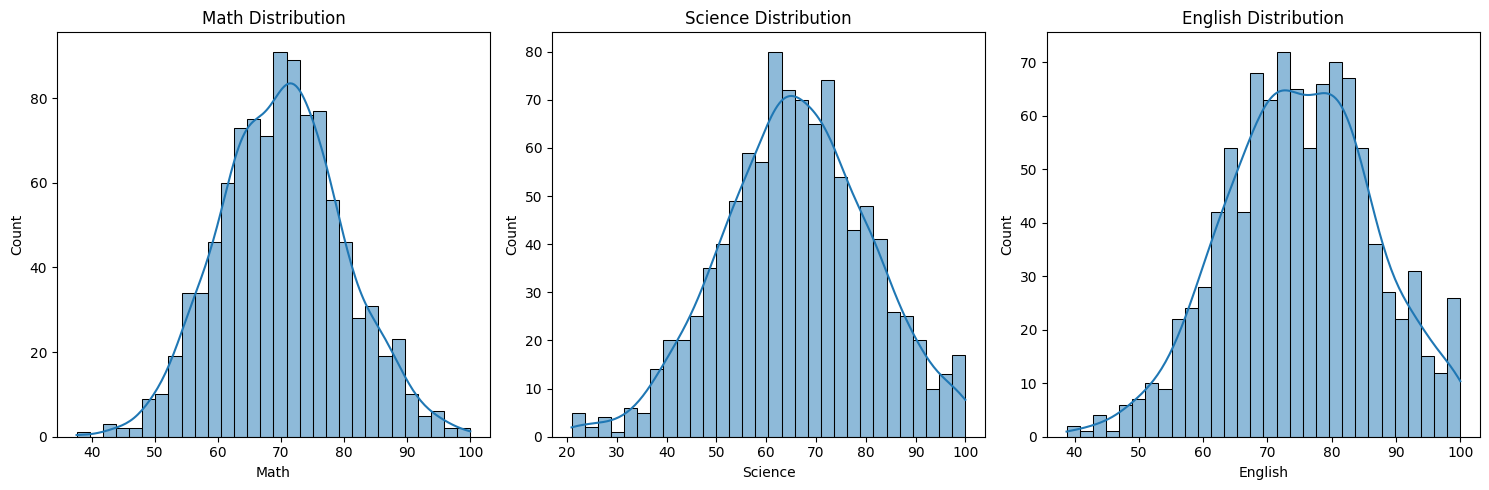

In [4]:
# Histograms with KDE
plt.figure(figsize=(15, 5))
for i, subject in enumerate(df.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[subject], kde=True, bins=30)
    plt.title(f"{subject} Distribution")
plt.tight_layout()
plt.show()


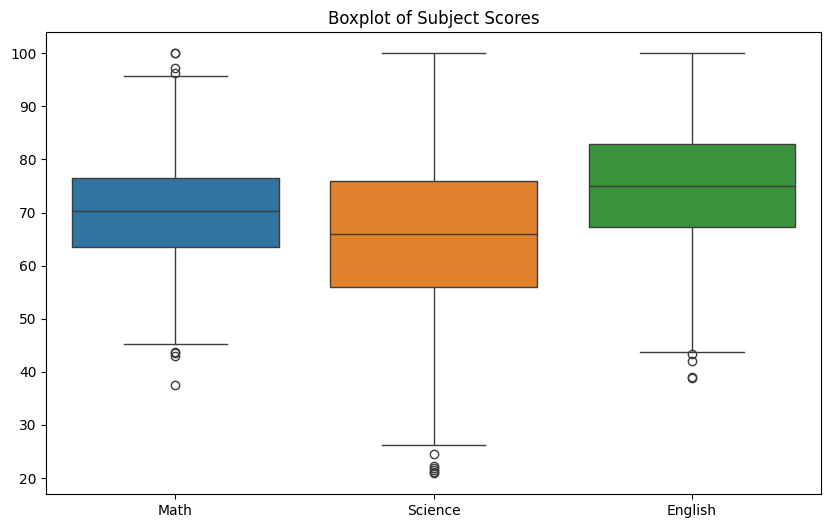

In [5]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Subject Scores")
plt.show()
